# Task 4: Spam SMS Detection

Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data Preprocessing

In [6]:
#load the dataset
df= pd.read_csv("C:/Users/mahi/Documents/Spam SMS Detection/spam.csv",encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
#renaming the columns as Label and Message
df=df.rename(columns={"v1":"Label","v2":"Message"})
#removing the unwanted columns
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)##
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#encoding the labels
#using map function that acts as an iterator
df['Label']=df['Label'].map({'ham':0,'spam':1})
df

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Feature Extraction

In [16]:
#TF-IDF Vectorization
vectorizer=TfidfVectorizer(stop_words=['english'], max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

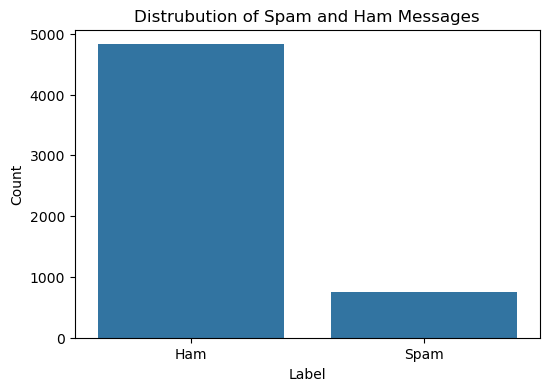

In [19]:
# plotting rhe distribution of spam and ham messages
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label')
plt.title('Distrubution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# Model Training

In [ ]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Label'], test_size=0.2, random_state=42)
df

Naive Bayes:

In [23]:
nb_model=MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)
y_pred_nb=nb_model.predict(X_test_tfidf)
print(y_pred_nb)

[0 0 0 ... 0 0 1]


In [25]:
accuracy_nb=accuracy_score(y_test,y_pred_nb)
precision_nb=precision_score(y_test,y_pred_nb)
recall_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)

Logistcic Regression:

In [28]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
print(y_pred_lr)

[0 0 0 ... 0 0 0]


In [30]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

Support Vector Machine (SVM):

In [33]:
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
print(y_pred_svm)

[0 0 1 ... 0 0 1]


In [162]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Model Evaluation

In [166]:
data = {
    "Model": ["Naive Bayes", "Logistic Regression", "SVM"],
    "Accuracy": [accuracy_nb, accuracy_lr, accuracy_svm],
    "Precision": [precision_nb, precision_lr, precision_svm],
    "Recall": [recall_nb, recall_lr, recall_svm],
    "F1 Score": [f1_nb, f1_lr, f1_svm],
}

df_metrics = pd.DataFrame(data)
display(df_metrics)

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.975785,1.000000,0.820000,0.901099
1,Logistic Regression,0.969507,0.991525,0.780000,0.873134
2,SVM,0.980269,1.000000,0.853333,0.920863
